### Part IV: Training a Machine Learning Model

In [3]:
# import libraries
import pandas as pd

# import ML libraries
from sklearn.model_selection import train_test_split   # prediction of rating is a classification task so we use classification model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# import metrics
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
df = pd.read_csv('thebiglist_clean_extended_final.csv')
df

,Stars,is_Spicy,has_Chicken,has_beef,has_seafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,3.5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# take a look at Stars
df['Stars'].value_counts() # the column, certian number of Stars had low frequency which cannot use for classification modeling

5.000    667
3.500    543
3.750    535
4.000    439
4.500    243
3.250    222
4.250    217
3.000    172
2.750    110
2.000     95
2.500     95
4.750     93
1.500     50
0.000     40
1.000     38
2.250     29
1.750     28
0.500     20
0.250     17
1.250     14
1.100      2
3.100      2
2.900      2
0.750      2
2.800      2
4.125      2
2.850      1
2.300      1
3.600      1
3.700      1
3.650      1
0.100      1
3.400      1
3.125      1
1.800      1
3.200      1
2.100      1
2.125      1
0.900      1
Name: Stars, dtype: int64

In [7]:
# import ploting libraries
import matplotlib.pyplot as plt

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

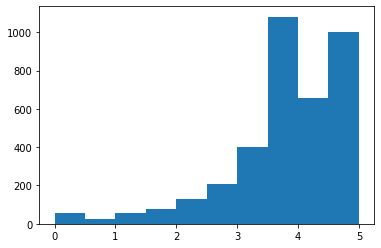

In [8]:
plt.hist(df['Stars'])

In [10]:
# an art to determine where to cut off
df['Stars'].median()  # below to class as 'other'

3.75

In [12]:
df[df['Stars'] > 4.74] # see from the value counts 80% top around above 4.75

,Stars,is_Spicy,has_Chicken,has_beef,has_seafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,5.0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,5.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
11,5.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,5.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,5.0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3645,5.0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3647,5.0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3664,5.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
len(df[df['Stars'] > 4.5])

760

In [18]:
len(df[df['Stars'] > 3.75])

1661

In [17]:
pd.qcut(df['Stars'],q=2),#labels=[0,1])  # use for loo or qcut(simpler) to creat a newstar column
# auto create an interval

(0          (3.75, 5.0]
 1       (-0.001, 3.75]
 2          (3.75, 5.0]
 3          (3.75, 5.0]
 4       (-0.001, 3.75]
              ...      
 3687    (-0.001, 3.75]
 3688    (-0.001, 3.75]
 3689    (-0.001, 3.75]
 3690    (-0.001, 3.75]
 3691    (-0.001, 3.75]
 Name: Stars, Length: 3692, dtype: category
 Categories (2, interval[float64]): [(-0.001, 3.75] < (3.75, 5.0]],)

In [20]:
pd.qcut(df['Stars'],q=2,labels=[0,1])

0       1
1       0
2       1
3       1
4       0
       ..
3687    0
3688    0
3689    0
3690    0
3691    0
Name: Stars, Length: 3692, dtype: category
Categories (2, int64): [0 < 1]

In [21]:
df['binStars'] = pd.qcut(df['Stars'],q=2,labels=[0,1])
df

,Stars,is_Spicy,has_Chicken,has_beef,has_seafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,...,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States,binStars
0,5.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,3.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3688,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3689,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3690,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
df['binStars'].value_counts()

0    2031
1    1661
Name: binStars, dtype: int64

In [25]:
# prepare independent (X) and dependent variables (y)
X = df.drop(['binStars','Stars'],axis = 1)
y = df['binStars']
X

,is_Spicy,has_Chicken,has_beef,has_seafood,from_Acecook,from_Indomie,from_Itsuki,from_JML,from_KOKA,from_Lucky Me!,...,in_Hong Kong,in_Indonesia,in_Japan,in_Malaysia,in_Other,in_Singapore,in_South Korea,in_Taiwan,in_Thailand,in_United States
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3689,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3690,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
y

0       1
1       0
2       1
3       1
4       0
       ..
3687    0
3688    0
3689    0
3690    0
3691    0
Name: binStars, Length: 3692, dtype: category
Categories (2, int64): [0 < 1]

In [29]:
# split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                   stratify = y) # y, cos slightly imbalance in dataset, to make sure there are equally distributed across the dataset 


In [31]:
# let's set a baseline with a DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
dummy_pred = dummy.predict(X_test)

/Users/APPLE/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [32]:
# assess the performance of DummyClassifieabsr
confusion_matrix(y_test,dummy_pred)

array([[226, 181],
       [194, 138]])

FN 194 and FP 181 predict not good

In [33]:
print(classification_report(y_test,dummy_pred))

              precision    recall  f1-score   support

           0       0.54      0.56      0.55       407
           1       0.43      0.42      0.42       332

    accuracy                           0.49       739
   macro avg       0.49      0.49      0.49       739
weighted avg       0.49      0.49      0.49       739



Accuracy is 49%

In [35]:
# Start with LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
logr_pred = logr.predict(X_test)

In [36]:
confusion_matrix(y_test,logr_pred)

array([[279, 128],
       [127, 205]])

Better performance

In [38]:
print(classification_report(y_test,logr_pred))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       407
           1       0.62      0.62      0.62       332

    accuracy                           0.65       739
   macro avg       0.65      0.65      0.65       739
weighted avg       0.66      0.65      0.65       739



Accuracy improve from 49% to 65%

In [42]:
# move on to decisontreeclassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)

In [43]:
confusion_matrix(y_test,tree_pred)

array([[272, 135],
       [137, 195]])

In [45]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67       407
           1       0.59      0.59      0.59       332

    accuracy                           0.63       739
   macro avg       0.63      0.63      0.63       739
weighted avg       0.63      0.63      0.63       739



63% accuracy, almost as good as logisticRegression model

In [49]:
# move on to RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
forest_pred = forest.predict(X_test)

In [50]:
confusion_matrix(y_test,forest_pred)

array([[262, 145],
       [126, 206]])

In [51]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       407
           1       0.59      0.62      0.60       332

    accuracy                           0.63       739
   macro avg       0.63      0.63      0.63       739
weighted avg       0.64      0.63      0.63       739



Accuracy 63%, same as Decisiontree model

Conclusion : LogisticRegression model perform the best out of these three model (plenty of othe rmodel can try out to make it better )

In [53]:
logr.coef_  # array containing position number mean the feature use in the model to predict

array([[ 0.32641619, -0.54651752, -0.3077354 , -0.20668449, -0.92255542,
         0.23073838, -0.04324384,  0.17327289, -0.28942185,  0.16588786,
         0.4891598 , -0.39930437,  0.64911768, -0.27201962, -0.2703306 ,
         0.95873486,  1.99785992, -0.06864417,  0.26157803,  0.59387755,
        -0.22897842, -0.99660444,  0.17134048,  0.76190786, -0.46693261,
         0.38661962, -0.78182025, -0.39780398, -0.84578394, -0.67827644,
        -0.54577816, -0.51309912, -0.18464258,  0.30619945, -0.43460031,
         1.24411286,  0.22136149, -0.02927205,  0.30270215,  0.94010072,
         0.61871624,  0.638697  , -0.95712833,  0.6546975 ,  0.09158681,
         0.56394396, -1.01719068,  0.02468301]])

In [54]:
logr.coef_[0]

array([ 0.32641619, -0.54651752, -0.3077354 , -0.20668449, -0.92255542,
        0.23073838, -0.04324384,  0.17327289, -0.28942185,  0.16588786,
        0.4891598 , -0.39930437,  0.64911768, -0.27201962, -0.2703306 ,
        0.95873486,  1.99785992, -0.06864417,  0.26157803,  0.59387755,
       -0.22897842, -0.99660444,  0.17134048,  0.76190786, -0.46693261,
        0.38661962, -0.78182025, -0.39780398, -0.84578394, -0.67827644,
       -0.54577816, -0.51309912, -0.18464258,  0.30619945, -0.43460031,
        1.24411286,  0.22136149, -0.02927205,  0.30270215,  0.94010072,
        0.61871624,  0.638697  , -0.95712833,  0.6546975 ,  0.09158681,
        0.56394396, -1.01719068,  0.02468301])

In [61]:
logr_feature = pd.DataFrame({'feature': X.columns,
                           'importance':logr.coef_[0]})
logr_feature

,feature,importance
0,is_Spicy,0.326416
1,has_Chicken,-0.546518
2,has_beef,-0.307735
3,has_seafood,-0.206684
4,from_Acecook,-0.922555
5,from_Indomie,0.230738
6,from_Itsuki,-0.043244
7,from_JML,0.173273
8,from_KOKA,-0.289422
9,from_Lucky Me!,0.165888


In [62]:
# to rank the features importancy weight vranking top 10
logr_feature.sort_values('importance',ascending=False)

,feature,importance
16,from_MyKuali,1.997860
35,is_Other,1.244113
15,from_Master Kong,0.958735
39,in_Indonesia,0.940101
23,from_Samyang Foods,0.761908
43,in_Singapore,0.654697
12,from_Mama,0.649118
41,in_Malaysia,0.638697
40,in_Japan,0.618716
19,from_Nongshim,0.593878


Just check through above ...make sense? yes it is ie: Mykuali get higher weight, has chicken not playing important..etc

In [67]:
forest_feature = pd.DataFrame({'feature': X.columns,
                           'importance':forest.feature_importances_})
forest_feature.sort_values('importance',ascending=False)

,feature,importance
0,is_Spicy,0.096988
42,in_Other,0.094291
36,is_Pack,0.062551
1,has_Chicken,0.057693
3,has_seafood,0.056021
34,is_Cup,0.048864
2,has_beef,0.043677
20,from_Other,0.043620
18,from_Nissin,0.034337
47,in_United States,0.031009


In [68]:
tree_feature = pd.DataFrame({'feature': X.columns,
                           'importance':tree.feature_importances_})
tree_feature.sort_values('importance',ascending=False)

,feature,importance
42,in_Other,0.150799
0,is_Spicy,0.079284
1,has_Chicken,0.063571
3,has_seafood,0.055584
34,is_Cup,0.050532
46,in_Thailand,0.048257
20,from_Other,0.039812
36,is_Pack,0.039752
2,has_beef,0.039192
18,from_Nissin,0.036303


The end
Reacp:
1. PART I - collected and cleaned the dataset for the project
2. PART II - Extracted additional information (informed by your domain expertise), visualized the festues in the data, finally performed statistical test of differece
3. PART III - engineered new columns based on categorical columns
4. PART IV - trained the ML model to predict instant ramen binned Stars